# Brain Tumor Detection

A crucial part of any deep learning project is the dataset, and for this project, we’ve selected a dataset of brain MRI scans that is well-suited for tumor detection tasks. The dataset contains labeled images of MRI scans, categorized into four main classes:

- Glioma: A type of tumor that starts in the glial cells of the brain.
- Meningioma: A tumor that forms in the meninges, the layers of tissue covering the brain and spinal cord.
- Pituitary: Tumors that arise from the pituitary gland, a small gland located at the base of the brain.
- No Tumor: MRI scans that do not show any tumor.

**This dataset is divided into two main folders:**

- Training: This folder contains the images used to train the model.
- Testing: This folder contains unseen images that will be used to evaluate the performance of the trained model.

Each class has its own subfolder, and all images are in JPG format. In the next steps of the project, we’ll need to preprocess the data by resizing, normalizing, and augmenting the images to make them suitable for deep learning.

### Preprocessing the Data

Data preprocessing is a critical step in any deep learning project. For this project, we’ll apply several preprocessing techniques to ensure that the data is in the best shape possible for training the model. Some of the preprocessing steps include:

- Resizing: We’ll resize all images to a consistent size so that the model can process them correctly.
- Normalization: We’ll scale the pixel values of the images to a range between 0 and 1, which helps the model learn more efficiently.
- Data Augmentation: To prevent the model from overfitting and to introduce more variation into the training data, we’ll use techniques like rotation, flipping, and zooming.
- Splitting the Data: We’ll divide the dataset into training, validation, and test sets to ensure that the model is evaluated fairly and can generalize to new data.

In [ ]:
print("Extracted files and folders:", os.listdir(extract_path))


Extracted files and folders: ['Testing', 'Training']


In [ ]:
for root, dirs, files in os.walk(extract_path):
    print(f"Directory: {root}")
    for file in files:
        print(f" - {file}")


Streaming output truncated to the last 5000 lines.
 - Tr-pi_1117.jpg
 - Tr-pi_0957.jpg
 - Tr-pi_0214.jpg
 - Tr-pi_0220.jpg
 - Tr-pi_1037.jpg
 - Tr-pi_1231.jpg
 - Tr-pi_0071.jpg
 - Tr-pi_1178.jpg
 - Tr-pi_0339.jpg
 - Tr-pi_0311.jpg
 - Tr-piTr_0005.jpg
 - Tr-pi_0359.jpg
 - Tr-pi_1222.jpg
 - Tr-pi_1400.jpg
 - Tr-pi_1055.jpg
 - Tr-pi_0063.jpg
 - Tr-pi_0052.jpg
 - Tr-pi_0218.jpg
 - Tr-pi_0977.jpg
 - Tr-pi_0163.jpg
 - Tr-pi_0396.jpg
 - Tr-pi_0967.jpg
 - Tr-pi_0893.jpg
 - Tr-pi_0913.jpg
 - Tr-pi_0326.jpg
 - Tr-pi_1275.jpg
 - Tr-pi_1012.jpg
 - Tr-pi_0380.jpg
 - Tr-pi_0721.jpg
 - Tr-pi_1441.jpg
 - Tr-pi_0930.jpg
 - Tr-pi_1177.jpg
 - Tr-pi_0420.jpg
 - Tr-pi_0170.jpg
 - Tr-pi_0894.jpg
 - Tr-pi_0539.jpg
 - Tr-pi_1189.jpg
 - Tr-pi_0836.jpg
 - Tr-pi_0881.jpg
 - Tr-pi_1064.jpg
 - Tr-pi_1226.jpg
 - Tr-pi_1111.jpg
 - Tr-pi_1450.jpg
 - Tr-pi_0844.jpg
 - Tr-pi_0590.jpg
 - Tr-pi_0860.jpg
 - Tr-pi_1322.jpg
 - Tr-pi_0268.jpg
 - Tr-pi_0720.jpg
 - Tr-pi_1096.jpg
 - Tr-pi_0492.jpg
 - Tr-pi_0271.jpg
 - Tr-pi_14

In [ ]:
import os

# Define the path to the extracted dataset
extract_path = 'data'  # This is where your dataset was extracted

# Define the folders you expect to find
expected_subfolders = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Check for "Training" and "Testing" directories
train_path = os.path.join(extract_path, 'Training')
test_path = os.path.join(extract_path, 'Testing')

print("Checking Training and Testing folders...")

# Verify that both directories exist
if os.path.exists(train_path) and os.path.exists(test_path):
    print("✅ 'Training' and 'Testing' folders found.")
else:
    print("❌ 'Training' or 'Testing' folder is missing.")

# Function to check subfolders
def check_subfolders(path, expected_folders):
    if os.path.exists(path):
        actual_folders = os.listdir(path)
        print(f"\nContents of '{path}': {actual_folders}")

        # Verify if expected folders exist
        missing_folders = [folder for folder in expected_folders if folder not in actual_folders]
        if not missing_folders:
            print(f"✅ All expected folders ({', '.join(expected_folders)}) are present in '{path}'.")
        else:
            print(f"❌ Missing folders in '{path}': {', '.join(missing_folders)}")
    else:
        print(f"❌ Path '{path}' does not exist.")

# Check subfolders in Training and Testing directories
check_subfolders(train_path, expected_subfolders)
check_subfolders(test_path, expected_subfolders)

Checking Training and Testing folders...
✅ 'Training' and 'Testing' folders found.

Contents of 'data/Training': ['pituitary', 'meningioma', 'glioma', 'notumor']
✅ All expected folders (glioma, meningioma, notumor, pituitary) are present in 'data/Training'.

Contents of 'data/Testing': ['pituitary', 'meningioma', 'glioma', 'notumor']
✅ All expected folders (glioma, meningioma, notumor, pituitary) are present in 'data/Testing'.


#### Encoding Labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

#Collecting folder names as class labels
train_dir = os.path.join(extract_path, 'Training')
class_names = sorted(os.listdir(train_dir))
print(f"Class Names: {class_names}")

# Encoding class labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(class_names)
print(f"Encoded Labels: {dict(zip(class_names, encoded_labels))}")

Class Names: ['glioma', 'meningioma', 'notumor', 'pituitary']
Encoded Labels: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


### Loading and Preprocessing Images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image size and data directory
image_size = (224, 224)
train_dir = 'data/Training'

# Create an ImageDataGenerator object for training (with real-time augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Use the flow_from_directory method to load data directly from the directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,  # Resize images to 224x224
    batch_size=32,  # Number of images to process at once
    class_mode='categorical'  # Use categorical labels for multi-class classification
)

# Checking the generator output (optional)
print(f"Training images loaded: {train_generator.samples}")
print(f"Classes: {train_generator.class_indices}")

Found 5712 images belonging to 4 classes.
Training images loaded: 5712
Classes: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [ ]:
# ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values to [0, 1]
    rotation_range=20,            # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,        # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,       # Randomly shift images vertically by up to 20%
    shear_range=0.2,              # Apply shear transformation
    zoom_range=0.2,               # Randomly zoom into images
    horizontal_flip=True,         # Randomly flip images horizontally
    validation_split=0.2          # Reserve 20% of data for validation
)

# Load and preprocess the training set
train_data = datagen.flow_from_directory(
    'data/Training',              # Path to the training dataset
    target_size=(224, 224),       # Resize images to 224x224
    batch_size=32,                # Batch size for loading data
    class_mode='categorical',     # One-hot encoding for labels
    subset='training'             # Use this for the training subset
)

# Load and preprocess the validation set
val_data = datagen.flow_from_directory(
    'data/Training',              # Path to the training dataset
    target_size=(224, 224),       # Resize images to 224x224
    batch_size=32,                # Batch size for loading data
    class_mode='categorical',     # One-hot encoding for labels
    subset='validation'           # Use this for the validation subset
)

# Now, for the test set, we don't want to augment the data, so we will set the validation_split to None
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data
test_data = test_datagen.flow_from_directory(
    'data/Testing',               # Path to the test dataset
    target_size=(224, 224),       # Resize images to 224x224
    batch_size=32,                # Batch size for loading data
    class_mode='categorical'      # One-hot encoding for labels
)

print("Data split into training, validation, and test sets successfully.")

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Data split into training, validation, and test sets successfully.


In [ ]:
# ImageDataGenerator for training with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values to [0, 1]
    rotation_range=30,            # Randomly rotate images by up to 30 degrees
    width_shift_range=0.2,        # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,       # Randomly shift images vertically by up to 20%
    shear_range=0.2,              # Apply shear transformation
    zoom_range=0.2,               # Randomly zoom into images
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest',          # Fill empty pixels after transformations
    validation_split=0.2          # Reserve 20% of data for validation
)

# ImageDataGenerator for validation and test (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

# Training Data Generator
train_data = train_datagen.flow_from_directory(
    'data/Training',              # Path to the training dataset
    target_size=(224, 224),       # Resize images to 224x224
    batch_size=32,                # Batch size for loading data
    class_mode='categorical',     # One-hot encoding for labels
    subset='training'             # Use this for the training subset
)

# Validation Data Generator (no augmentation, only rescaling)
val_data = train_datagen.flow_from_directory(
    'data/Training',              # Path to the training dataset
    target_size=(224, 224),       # Resize images to 224x224
    batch_size=32,                # Batch size for loading data
    class_mode='categorical',     # One-hot encoding for labels
    subset='validation'           # Use this for the validation subset
)

# Test Data Generator (only rescaling, no augmentation)
test_data = test_datagen.flow_from_directory(
    'data/Testing',               # Path to the test dataset
    target_size=(224, 224),       # Resize images to 224x224
    batch_size=32,                # Batch size for loading data
    class_mode='categorical'      # One-hot encoding for labels
)

print("Data augmentation applied successfully to the training set.")

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Data augmentation applied successfully to the training set.


<ipython-input-14-ecbcec791022>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_names, y=num_images_per_class, palette='Set2')


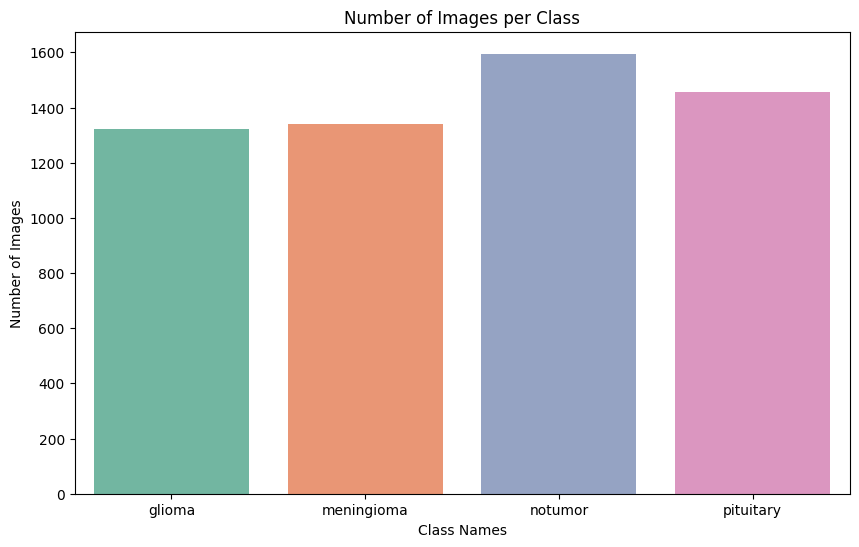

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Path to the extracted training directory
train_dir = 'data/Training'

# Get the number of images per class
class_names = sorted(os.listdir(train_dir))
num_images_per_class = [len(os.listdir(os.path.join(train_dir, class_name))) for class_name in class_names]

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=class_names, y=num_images_per_class, palette='Set2')
plt.title('Number of Images per Class')
plt.xlabel('Class Names')
plt.ylabel('Number of Images')
plt.show()

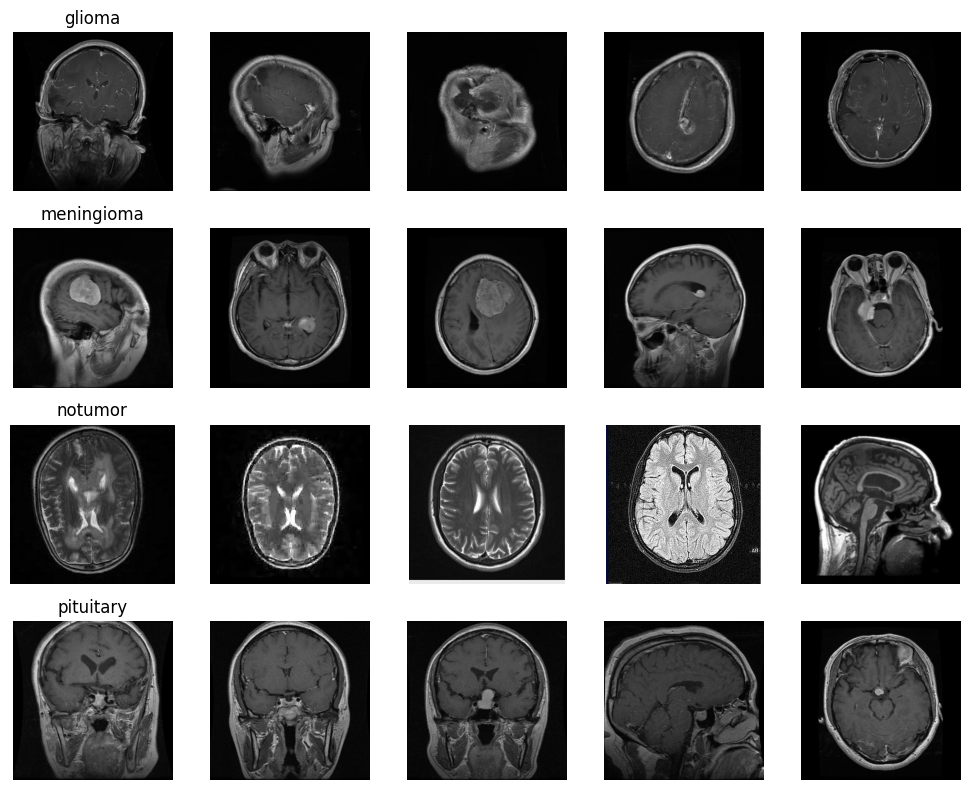

In [ ]:
import matplotlib.pyplot as plt
import cv2

# Define a function to plot sample images from each class
def plot_sample_images(directory, class_names, num_samples=5):
    plt.figure(figsize=(10, 8))
    for i, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        sample_images = os.listdir(class_dir)[:num_samples]
        for j, img_name in enumerate(sample_images):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for plotting
            plt.subplot(len(class_names), num_samples, i*num_samples + j + 1)
            plt.imshow(img)
            plt.axis('off')
            if j == 0:
                plt.title(class_name)
    plt.tight_layout()
    plt.show()

# Plot sample images
plot_sample_images(train_dir, class_names)

Image Shape: (512, 512, 3) (Height x Width x Channels)


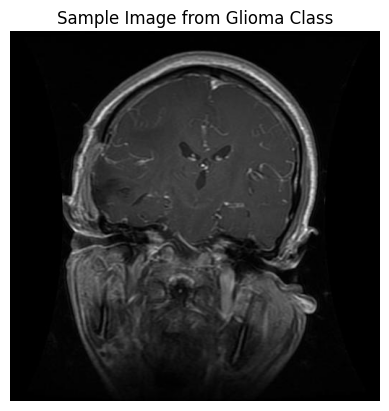

In [ ]:
# Check the dimensions of a few sample images
sample_image_path = os.path.join(train_dir, 'glioma', os.listdir(os.path.join(train_dir, 'glioma'))[0])
img = cv2.imread(sample_image_path)

# Get image properties
image_shape = img.shape
print(f"Image Shape: {image_shape} (Height x Width x Channels)")

# Display image for visual inspection
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Sample Image from Glioma Class')
plt.axis('off')
plt.show()

In [ ]:
import os

def check_image_integrity(directory):
    valid_images = []
    invalid_images = []

    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                img = cv2.imread(img_path)
                if img is None:
                    invalid_images.append(img_path)
                else:
                    valid_images.append(img_path)
            except Exception as e:
                invalid_images.append(img_path)

    print(f"Total valid images: {len(valid_images)}")
    print(f"Total invalid images: {len(invalid_images)}")
    return valid_images, invalid_images

# Check integrity of the training data
valid_images, invalid_images = check_image_integrity(train_dir)

if invalid_images:
    print("Some invalid images found, they will be excluded from the dataset.")
else:
    print("All images are valid.")

Total valid images: 5712
Total invalid images: 0
All images are valid.


In [ ]:
import cv2
import numpy as np

def check_image_blurriness(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return 0
    variance = cv2.Laplacian(img, cv2.CV_64F).var()
    return variance

# Example: Checking blurriness for a sample image
image_path = os.path.join(train_dir, 'glioma', os.listdir(os.path.join(train_dir, 'glioma'))[0])
blur_score = check_image_blurriness(image_path)

print(f"Blurriness score of the image: {blur_score}")
if blur_score < 100:  # Arbitrary threshold for blurriness
    print("This image seems to be blurry and may need further attention.")

Blurriness score of the image: 60.95361304283142
This image seems to be blurry and may need further attention.


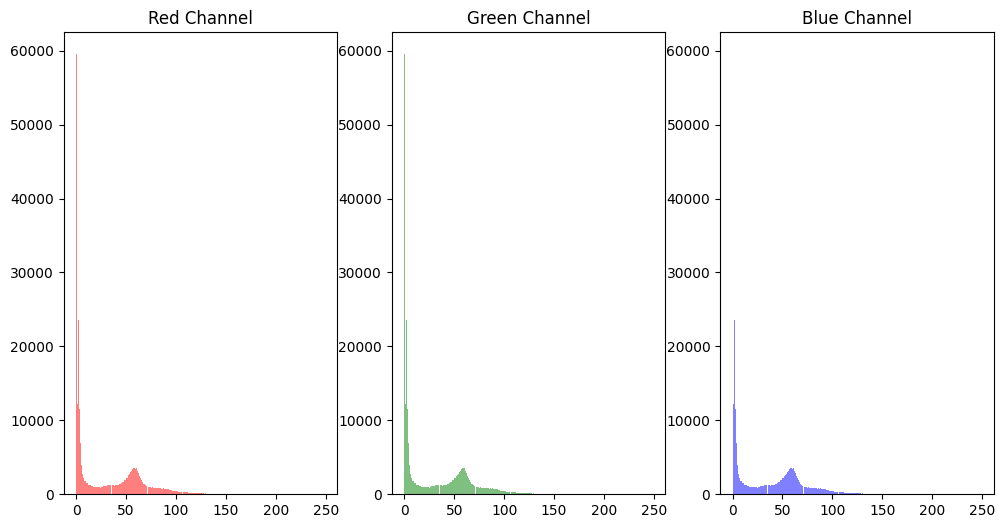

In [ ]:
import matplotlib.pyplot as plt
import cv2

def plot_image_histogram(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Separate the color channels
    r, g, b = cv2.split(img_rgb)

    # Plot histograms for each channel
    plt.figure(figsize=(12, 6))
    plt.subplot(131)
    plt.hist(r.ravel(), bins=256, color='red', alpha=0.5)
    plt.title('Red Channel')

    plt.subplot(132)
    plt.hist(g.ravel(), bins=256, color='green', alpha=0.5)
    plt.title('Green Channel')

    plt.subplot(133)
    plt.hist(b.ravel(), bins=256, color='blue', alpha=0.5)
    plt.title('Blue Channel')

    plt.show()

# Example: Plotting histogram for a sample image
image_path = os.path.join(train_dir, 'glioma', os.listdir(os.path.join(train_dir, 'glioma'))[0])
plot_image_histogram(image_path)

In [ ]:
def check_resolution_consistency(directory):
    resolutions = []

    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            resolutions.append(img.shape[:2])  # Add height, width as resolution

    return resolutions

# Check resolution consistency
resolutions = check_resolution_consistency(train_dir)
unique_resolutions = set(resolutions)
print(f"Unique resolutions in dataset: {unique_resolutions}")

Unique resolutions in dataset: {(903, 721), (417, 428), (249, 206), (320, 257), (510, 485), (282, 230), (342, 290), (326, 273), (504, 450), (274, 244), (649, 926), (224, 234), (225, 208), (600, 652), (424, 417), (554, 554), (332, 590), (480, 852), (248, 200), (1075, 890), (446, 450), (337, 305), (377, 341), (257, 196), (450, 600), (393, 313), (249, 201), (528, 528), (228, 236), (210, 200), (239, 236), (293, 216), (274, 230), (872, 850), (394, 295), (243, 233), (395, 367), (502, 502), (236, 212), (217, 208), (356, 286), (369, 503), (605, 600), (269, 236), (489, 416), (237, 213), (401, 312), (214, 229), (262, 224), (280, 278), (220, 236), (303, 252), (304, 235), (221, 228), (192, 192), (496, 414), (253, 278), (225, 207), (225, 225), (277, 235), (248, 208), (340, 291), (216, 234), (250, 236), (350, 350), (228, 235), (442, 442), (239, 253), (624, 491), (201, 236), (357, 236), (213, 210), (506, 444), (244, 206), (395, 366), (273, 251), (236, 211), (359, 300), (418, 364), (251, 205), (218, 1

<ipython-input-21-c489730fd4f1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[0] for x in class_distribution], y=[x[1] for x in class_distribution], palette='Set2')


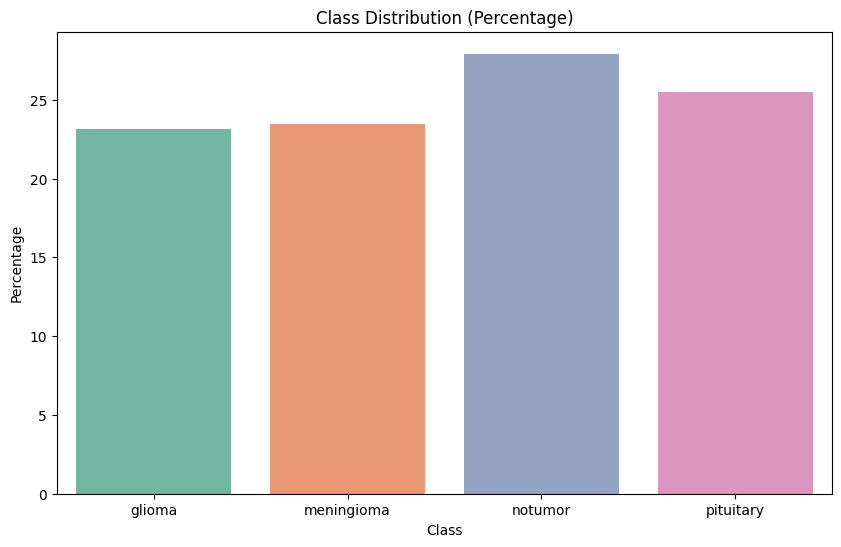

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate class distribution
class_counts = [len(os.listdir(os.path.join(train_dir, class_name))) for class_name in class_names]
total_samples = sum(class_counts)
class_distribution = [(class_name, count / total_samples * 100) for class_name, count in zip(class_names, class_counts)]

# Plot class distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[0] for x in class_distribution], y=[x[1] for x in class_distribution], palette='Set2')
plt.title('Class Distribution (Percentage)')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

In [ ]:
import hashlib

def find_duplicates(directory):
    hashes = {}
    duplicates = []

    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            with open(img_path, 'rb') as f:
                img_hash = hashlib.md5(f.read()).hexdigest()  # Compute hash of the image
                if img_hash in hashes:
                    duplicates.append(img_path)
                else:
                    hashes[img_hash] = img_path
    return duplicates

# Check for duplicates in the dataset
duplicates = find_duplicates(train_dir)
print(f"Found {len(duplicates)} duplicate images.")

Found 191 duplicate images.


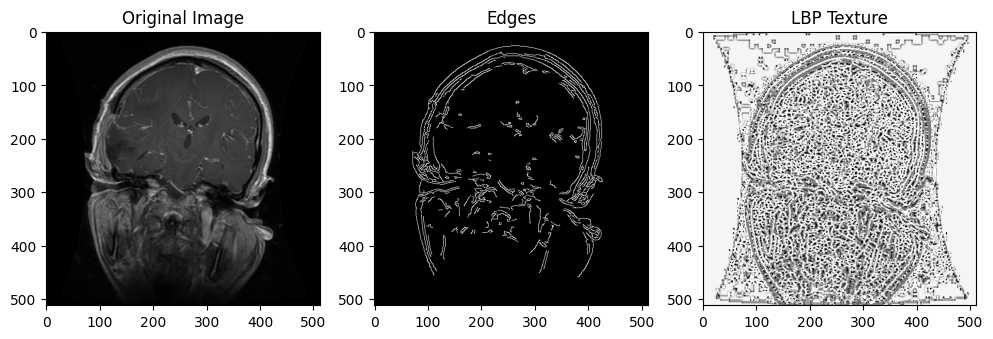

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

def extract_features(image_path):
    # Read the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply edge detection (Canny Edge Detector)
    edges = cv2.Canny(img, 100, 200)

    # Texture analysis (using Local Binary Pattern (LBP) from skimage)
    radius = 3
    n_points = 24
    lbp = local_binary_pattern(img, n_points, radius, method='uniform')

    # Plot original image, edges, and LBP
    plt.figure(figsize=(12, 6))
    plt.subplot(131)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    plt.subplot(132)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges')
    plt.subplot(133)
    plt.imshow(lbp, cmap='gray')
    plt.title('LBP Texture')
    plt.show()

# Example: Extracting features for a sample image
image_path = os.path.join(train_dir, 'glioma', os.listdir(os.path.join(train_dir, 'glioma'))[0])
extract_features(image_path)

In [ ]:
  import numpy as np
  import matplotlib.pyplot as plt
  from tensorflow.keras.layers import Dense, BatchNormalization, Reshape, Flatten
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  import gc
  import os

  # Step 1: Image Preprocessing and Augmentation
  train_datagen = ImageDataGenerator(
      rescale=1./255,  # Normalize images to [0, 1]
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
  )

  train_dir = 'data/Training'  # Adjust path to your dataset

  train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(64, 64),  # Reduced image size to prevent memory issues
      batch_size=16,         # Smaller batch size for stability
      class_mode=None        # Only images, no labels needed for GAN
  )

  # Step 2: Define the Generator Model
  def build_generator():
      model = Sequential()
      model.add(Dense(256, activation='relu', input_dim=100))
      model.add(BatchNormalization(momentum=0.8))
      model.add(Dense(512, activation='relu'))
      model.add(BatchNormalization(momentum=0.8))
      model.add(Dense(1024, activation='relu'))
      model.add(BatchNormalization(momentum=0.8))
      model.add(Dense(64 * 64 * 3, activation='tanh'))  # Output: 64x64 RGB image
      model.add(Reshape((64, 64, 3)))  # Reshape to image dimensions
      return model

  # Step 3: Define the Discriminator Model
  def build_discriminator():
      model = Sequential()
      model.add(Flatten(input_shape=(64, 64, 3)))
      model.add(Dense(512, activation='relu'))
      model.add(Dense(256, activation='relu'))
      model.add(Dense(128, activation='relu'))
      model.add(Dense(1, activation='sigmoid'))  # Output: Real or Fake
      model.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
      return model

  # Step 4: Combine Generator and Discriminator into a GAN Model
  def build_gan(generator, discriminator):
      discriminator.trainable = False
      model = Sequential()
      model.add(generator)
      model.add(discriminator)
      return model

  # Initialize the models
  generator = build_generator()
  discriminator = build_discriminator()
  gan = build_gan(generator, discriminator)

  # Compile the GAN
  gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

  # Step 5: Training the GAN
  def train_gan(generator, discriminator, gan, epochs=40, batch_size=16, save_interval=5):
      half_batch = batch_size // 2

      for epoch in range(epochs):
          # Train Discriminator
          real_images = next(train_generator)
          real_images = real_images[:half_batch]
          real_labels = np.ones((half_batch, 1)) * 0.9  # Label smoothing

          noise = np.random.normal(0, 1, (half_batch, 100))
          fake_images = generator.predict(noise)
          fake_labels = np.zeros((half_batch, 1))

          d_loss_real = discriminator.train_on_batch(real_images, real_labels)
          d_loss_fake = discriminator.train_on_batch(fake_images, fake_labels)
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

          # Train Generator
          noise = np.random.normal(0, 1, (batch_size, 100))
          valid_labels = np.ones((batch_size, 1))  # Fool the discriminator
          g_loss = gan.train_on_batch(noise, valid_labels)

          # Log Progress
          print(f"{epoch+1}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100*d_loss[1]}] [G loss: {g_loss}]")

          # Save Generated Images
          if (epoch + 1) % save_interval == 0:
              save_generated_images(generator, epoch + 1)

          # Clear memory to prevent crashes
          gc.collect()

  # Save Generated Images for Visualization
  def save_generated_images(generator, epoch, num_images=5):
      noise = np.random.normal(0, 1, (num_images, 100))  # Generate noise
      generated_images = generator.predict(noise)

      # Rescale images from [-1, 1] to [0, 1]
      generated_images = (generated_images + 1) / 2.0

      # Plot and save images
      fig, axes = plt.subplots(1, num_images, figsize=(10, 10))
      for i in range(num_images):
          axes[i].imshow(generated_images[i])
          axes[i].axis('off')
      plt.tight_layout()
      plt.savefig(f"generated_images_epoch_{epoch}.png")
      plt.close()

  # Train the GAN
  train_gan(generator, discriminator, gan, epochs=70, batch_size=32)

Found 5712 images belonging to 4 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/70 [D loss: 0.7248167991638184 | D accuracy: 25.0] [G loss: [array(0.70637757, dtype=float32), array(0.70637757, dtype=float32), array(0.5, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


2/70 [D loss: 0.7250152230262756 | D accuracy: 39.32291865348816] [G loss: [array(0.7187973, dtype=float32), array(0.7187973, dtype=float32), array(0.453125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
3/70 [D loss: 0.7249828577041626 | D accuracy: 37.39583492279053] [G loss: [array(0.722359, dtype=float32), array(0.722359, dtype=float32), array(0.38541666, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
4/70 [D loss: 0.7268365621566772 | D accuracy: 32.14285671710968] [G loss: [array(0.72657096, dtype=float32), array(0.72657096, dtype=float32), array(0.3125, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
5/70 [D loss: 0.7312604188919067 | D accuracy: 26.701390743255615] [G loss: [array(0.7317043, dtype=float32), array(0.7317043, dtype=float32), array(0.25625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6/70 [D loss: 0.7381222248077393 | D accuracy: 22.324810922145844] [G loss: [array(0.7393878, dtype=float32),

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


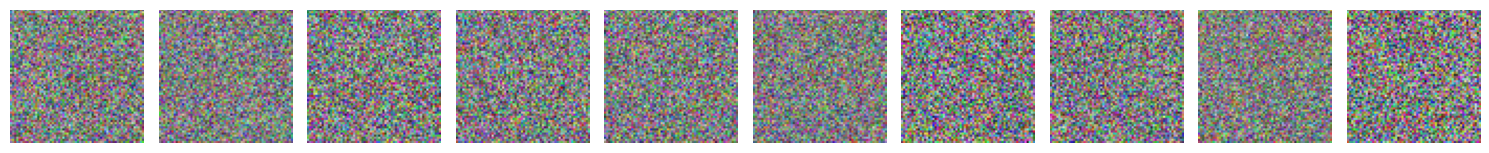

In [ ]:
# Assuming the generator has already been defined and trained

import numpy as np
import matplotlib.pyplot as plt

def generate_and_augment_features(generator, num_images=10, noise_dim=100):
    # Generate noise (latent vector)
    noise = np.random.normal(0, 1, (num_images, noise_dim))  # Generate latent vectors for synthetic images

    # Generate synthetic images using the trained generator
    generated_images = generator.predict(noise)

    # Rescale generated images to [0, 1]
    generated_images = (generated_images + 1) / 2.0

    # Visualize the generated images to observe the new features
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i in range(num_images):
        axes[i].imshow(generated_images[i])
        axes[i].axis('off')  # Hide axes to focus on the image itself
    plt.tight_layout()
    plt.show()

    return generated_images

# Example usage: Generate and visualize synthetic images for feature augmentation
augmented_features = generate_and_augment_features(generator)

<ipython-input-27-b79c902da849>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


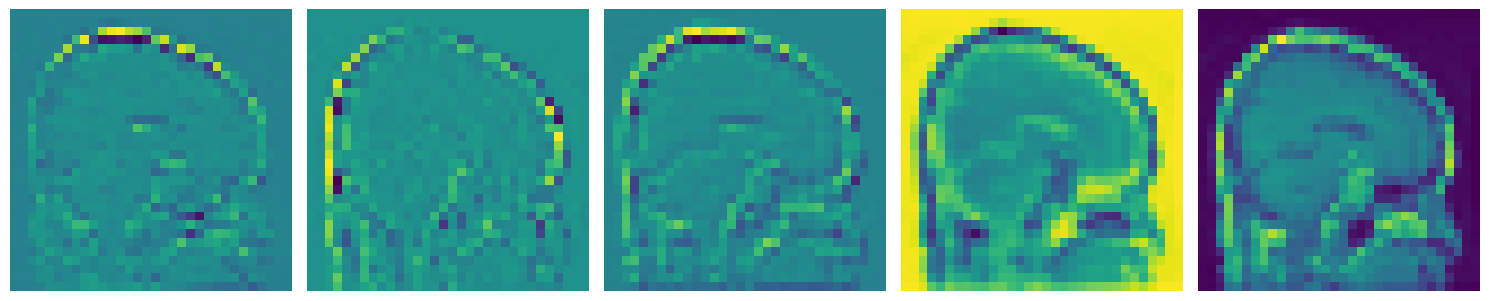

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
import numpy as np

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

# Create a new model to output intermediate layer activations
layer_name = 'Conv1'  # Changed to 'Conv1' (case-sensitive)
activation_model = Model(inputs=base_model.input, outputs=base_model.get_layer(layer_name).output)

# Preprocess the image
img_path = '/content/Tr-pi_1436.jpg'  # Replace with the actual path
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Get the feature map (activation) from the chosen layer
activation = activation_model.predict(img_array)

# Plot the activation maps (visualize some feature maps)
fig, axes = plt.subplots(1, 5, figsize=(15, 15))
for i in range(5):  # Visualizing the first 5 feature maps
    axes[i].imshow(activation[0, :, :, i], cmap='viridis')  # The 'viridis' colormap
    axes[i].axis('off')
plt.tight_layout()
plt.show()

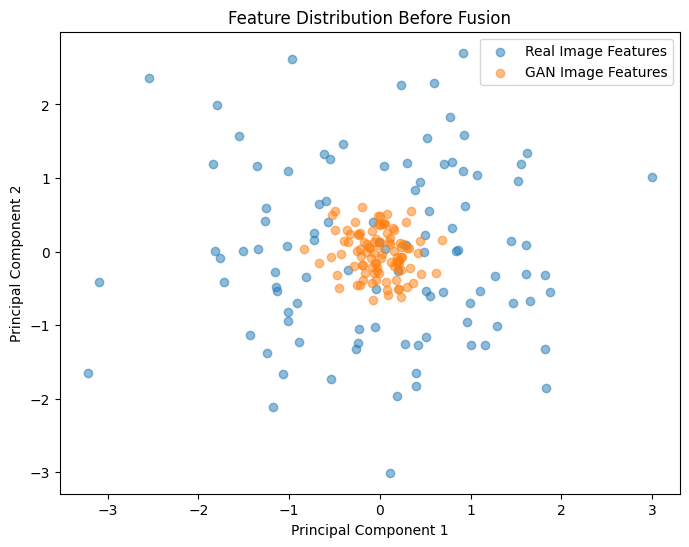

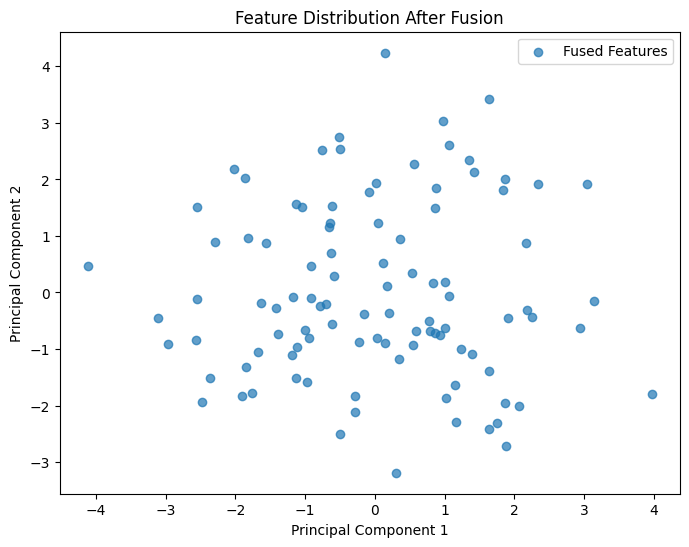

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Example: Random feature sets (replace with actual extracted features)
real_image_features = np.random.rand(100, 1024)  # Features from real images
gan_image_features = np.random.rand(100, 1024)   # Features from GAN-generated images

# Apply PCA to reduce the dimensionality for visualization (2D)
pca = PCA(n_components=2)
real_features_2d = pca.fit_transform(real_image_features)
gan_features_2d = pca.transform(gan_image_features)

# Visualize the feature distributions before fusion
plt.figure(figsize=(8, 6))
plt.scatter(real_features_2d[:, 0], real_features_2d[:, 1], label='Real Image Features', alpha=0.5)
plt.scatter(gan_features_2d[:, 0], gan_features_2d[:, 1], label='GAN Image Features', alpha=0.5)
plt.title("Feature Distribution Before Fusion")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Now, let's fuse the features (concatenate them)
fused_features = np.concatenate([real_image_features, gan_image_features], axis=1)

# Apply PCA again to visualize the fused features
fused_features_2d = pca.fit_transform(fused_features)

# Visualize the fused features
plt.figure(figsize=(8, 6))
plt.scatter(fused_features_2d[:, 0], fused_features_2d[:, 1], label='Fused Features', alpha=0.7)
plt.title("Feature Distribution After Fusion")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Set up ImageDataGenerator for training and validation with split
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize images to [0, 1]
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split training data into train/validation
)

# No separate validation_datagen needed as we are using validation_split

train_dir = 'data/Training'  # Adjust path to your dataset
# validation_dir is not needed as we are using validation_split

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # MobileNetV2 requires a 224x224 input size
    batch_size=32,
    class_mode='categorical',  # For multi-class classification (tumors types)
    subset='training'  # Specify training subset
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,  # Use the same directory as training
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify validation subset
)

# Step 2: Load pre-trained MobileNetV2 without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
base_model.trainable = False

# Step 3: Add custom layers on top of the MobileNetV2 model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting
x = Dense(512, activation='relu')(x)  # Fully connected layer
predictions = Dense(4, activation='softmax')(x)  # 4 output classes (Glioma, Meningioma, Pituitary, No Tumor)

# Final model
model = Model(inputs=base_model.input, outputs=predictions)

# Step 4: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,  # Set to desired number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Step 6: Save the trained model
model.save('brain_tumor_classifier.h5')

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


142/142 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.5496 - loss: 1.0769 - val_accuracy: 0.7054 - val_loss: 0.8287
Epoch 2/20
  1/142 ━━━━━━━━━━━━━━━━━━━━ 2:25 1s/step - accuracy: 0.9375 - loss: 0.2493

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9375 - loss: 0.2493 - val_accuracy: 0.5714 - val_loss: 1.2014
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.8021 - loss: 0.5242 - val_accuracy: 0.7357 - val_loss: 0.7542
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7500 - loss: 0.6212 - val_accuracy: 0.7619 - val_loss: 0.5748
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.8373 - loss: 0.4366 - val_accuracy: 0.7571 - val_loss: 0.6676
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8438 - loss: 0.4733 - val_accuracy: 0.7143 - val_loss: 0.7696
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 274s 2s/step - accuracy: 0.8398 - loss: 0.4102 - val_accuracy: 0.7571 - val_loss: 0.6916
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9062 - loss: 0.2111 - val_accuracy: 0.8095 - val_loss: 0.5353
Epoch 9/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 327s 2s/step - accuracy: 0.8477 - loss: 0.4114 - val_accuracy: 0.7848 - 

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


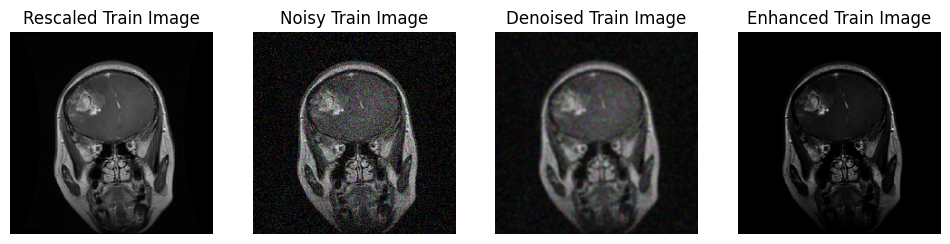

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def rescale_images(images):
    # Normalize images between 0 and 1
    images_rescaled = images / np.max(images)
    return images_rescaled

def enhance_images(images, gamma=2.0):
    # Gamma correction to adjust brightness and contrast (optional)
    images_enhanced = np.power(images, gamma)
    return images_enhanced

def add_noise(images, noise_factor=0.1):
    # Add Gaussian noise to images
    noise = np.random.normal(scale=noise_factor, size=images.shape)
    noisy_images = np.clip(images + noise, 0., 1.)  # Ensure values remain between 0 and 1
    return noisy_images

def denoise_image(image):
    # Apply Gaussian Blur for denoising (a simple denoising method)
    image_denoised = cv2.GaussianBlur(image, (5, 5), 0)
    return image_denoised

  # Load images using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)  # Rescale images

train_data_gen = datagen.flow_from_directory(
    'data/Training',  # Path to your training data
    target_size=(224, 224),  # Resize images
    batch_size=32,  # Adjust as needed
    class_mode='categorical',
    shuffle=False  # Important to keep the order for later processing
)

test_data_gen = datagen.flow_from_directory(
    'data/Testing',  # Path to your testing data
    target_size=(224, 224),
    batch_size=32,  # Adjust as needed
    class_mode='categorical',
    shuffle=False
)

# Get all images and labels from the generators
train_images, train_labels = next(train_data_gen)
# Repeat for as many batches as you have in your training data if it's larger than batch_size
# for i in range(train_data_gen.samples // train_data_gen.batch_size + 1):
#    x, y = next(train_data_gen)
#    train_images = np.append(train_images, x, axis=0)
#    train_labels = np.append(train_labels, y, axis=0)

test_images, test_labels = next(test_data_gen)

# Rescale images
train_images_rescaled = rescale_images(train_images)
test_images_rescaled = rescale_images(test_images)

# Optionally enhance the images (gamma correction or other methods)
train_images_enhanced = enhance_images(train_images_rescaled)
test_images_enhanced = enhance_images(test_images_rescaled)

# Create noisy images for training and testing
train_noisy_images = add_noise(train_images_rescaled)
test_noisy_images = add_noise(test_images_rescaled)

# Denoise the noisy images
train_denoised_images = np.array([denoise_image(img) for img in train_noisy_images])
test_denoised_images = np.array([denoise_image(img) for img in test_noisy_images])

# Visualize a sample image before and after processing
plt.figure(figsize=(12, 4))

# Original Image (Rescaled)
plt.subplot(1, 4, 1)
plt.imshow(train_images_rescaled[0])  # Visualize the first image after rescaling
plt.title("Rescaled Train Image")
plt.axis('off')

# Noisy Image (After adding noise)
plt.subplot(1, 4, 2)
plt.imshow(train_noisy_images[0])  # Visualize the noisy image
plt.title("Noisy Train Image")
plt.axis('off')

# Denoised Image
plt.subplot(1, 4, 3)
plt.imshow(train_denoised_images[0])  # Visualize the denoised image
plt.title("Denoised Train Image")
plt.axis('off')

# Enhanced Image (Gamma correction applied)
plt.subplot(1, 4, 4)
plt.imshow(train_images_enhanced[0])  # Visualize the enhanced image
plt.title("Enhanced Train Image")
plt.axis('off')

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load MobileNetV2 pre-trained model with weights from ImageNet
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of MobileNetV2
base_model.trainable = False

# Print model summary to understand the architecture
base_model.summary()

Model: "mobilenetv2_1.00_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 64, 64, 32)     │            864 │ input_layer_8[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 64, 64, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 64, 64, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 64, 64, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 64, 64, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 64, 64, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 64, 64, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 64, 64, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 64, 64, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 64, 64, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 65, 65, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 32, 32, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Set up ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize the images
    rotation_range=20,      # Random rotation for augmentation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Random shearing
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest'     # Fill missing pixels with nearest neighbor
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only normalize for the test set

# Create generators for the training and testing sets
train_generator = train_datagen.flow_from_directory(
    'data/Training',        # Path to training dataset
    target_size=(128, 128),  # Resize images to fit the model input size
    batch_size=32,
    class_mode='categorical' # Assuming you have multiple tumor classes
)

test_generator = test_datagen.flow_from_directory(
    'data/Testing',         # Path to testing dataset
    target_size=(128, 128),  # Resize images to fit the model input size
    batch_size=32,
    class_mode='categorical'
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
# Build the custom model
model = models.Sequential([
    base_model,  # Add the pre-trained base model
    layers.GlobalAveragePooling2D(),  # Global Average Pooling layer
    layers.Dense(1024, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,573,828 (13.63 MB)

 Trainable params: 1,315,844 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Unfreeze the top layers of the base model for fine-tuning
base_model.trainable = True

# Freeze all layers up to a specific layer
for layer in base_model.layers[:100]:  # Freeze the first 100 layers
    layer.trainable = False

# Compile the model again after unfreezing the layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Save the model
model.save('brain_tumor_model_transfer_learning.h5')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 900ms/step - accuracy: 0.4382 - loss: 1.3156 - val_accuracy: 0.5599 - val_loss: 0.9773
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 201s 896ms/step - accuracy: 0.7473 - loss: 0.6753 - val_accuracy: 0.6484 - val_loss: 0.7778
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 158s 876ms/step - accuracy: 0.8149 - loss: 0.5046 - val_accuracy: 0.7094 - val_loss: 0.6627
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 205s 895ms/step - accuracy: 0.8336 - loss: 0.4432 - val_accuracy: 0.7651 - val_loss: 0.5455
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 165s 915ms/step - accuracy: 0.8441 - loss: 0.4096 - val_accuracy: 0.7918 - val_loss: 0.5130
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 198s 893ms/step - accuracy: 0.8698 - loss: 0.3662 - val_accuracy: 0.8253 - val_loss: 0.4378
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 159s 882ms/step - accuracy: 0.8861 - loss: 0.3187 - val_accuracy: 0.8474 - val_loss: 0.3965
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 162s 898ms/step - accuracy: 0.8857 - loss: 0.30

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.2f}%')

41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 417ms/step - accuracy: 0.8641 - loss: 0.3706
Test Loss: 0.3534
Test Accuracy: 86.58%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Reuse the MobileNetV2 base model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of MobileNetV2
base_model.trainable = False

# Build the model architecture
model = models.Sequential([
    base_model,  # Pre-trained MobileNetV2
    layers.GlobalAveragePooling2D(),  # Global Average Pooling
    layers.Dense(1024, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout to prevent overfitting
    layers.Dense(4, activation='softmax')  # Output layer (4 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Unfreeze some layers for fine-tuning
base_model.trainable = True
for layer in base_model.layers[:100]:  # Freeze the first 100 layers
    layer.trainable = False

# Re-compile after unfreezing layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(
    train_generator,
    epochs=20,  # Train for 20 epochs
    validation_data=test_generator
)

# Save the model
model.save('brain_tumor_model_transfer_learning_finetuned.h5')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_generator)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_3           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │           4,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,573,828 (13.63 MB)

 Trainable params: 1,315,844 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 176s 891ms/step - accuracy: 0.4099 - loss: 1.3907 - val_accuracy: 0.5423 - val_loss: 1.0727
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 159s 884ms/step - accuracy: 0.7453 - loss: 0.6652 - val_accuracy: 0.6178 - val_loss: 0.8847
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 888ms/step - accuracy: 0.8056 - loss: 0.5176 - val_accuracy: 0.6728 - val_loss: 0.7534
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 208s 915ms/step - accuracy: 0.8386 - loss: 0.4601 - val_accuracy: 0.7368 - val_loss: 0.6287
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 196s 887ms/step - accuracy: 0.8537 - loss: 0.4016 - val_accuracy: 0.7765 - val_loss: 0.5750
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 161s 895ms/step - accuracy: 0.8792 - loss: 0.3342 - val_accuracy: 0.8124 - val_loss: 0.4791
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 202s 892ms/step - accuracy: 0.8766 - loss: 0.3335 - val_accuracy: 0.8345 - val_loss: 0.4303
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 203s 898ms/step - accuracy: 0.8824 -

41/41 ━━━━━━━━━━━━━━━━━━━━ 16s 392ms/step - accuracy: 0.9012 - loss: 0.3012
Test Loss: 0.3108
Test Accuracy: 88.71%


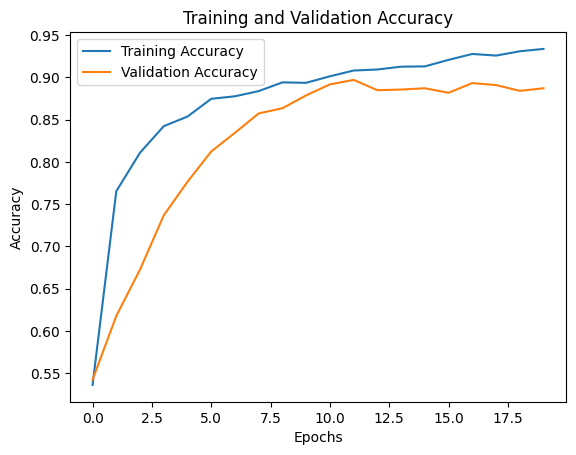

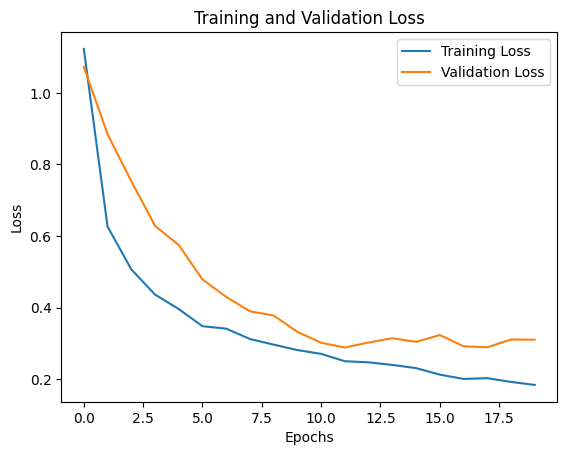

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Test the model on unseen data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy*100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 419ms/step - accuracy: 0.8903 - loss: 0.2906
Final Test Loss: 0.3108
Final Test Accuracy: 88.71%


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to preprocess the image
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
    return img_array

In [ ]:
# Function to make predictions
def predict_image(model_path, image_path, class_labels):
    # Load the saved model
    model = tf.keras.models.load_model(model_path)
    # Preprocess the image
    processed_image = preprocess_image(image_path)
    # Make predictions
    predictions = model.predict(processed_image)
    predicted_class = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions) * 100
    return class_labels[predicted_class], confidence

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

# Function to visualize the result
def visualize_prediction(image_path, predicted_class, confidence):
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.show()

Saving Tr-no_1575.jpg to Tr-no_1575.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


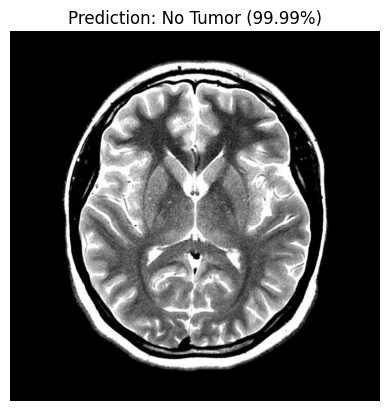

In [ ]:
from google.colab import files

# Define the class labels
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary']

# Path to the saved model
model_path = 'brain_tumor_model_transfer_learning_finetuned.h5'  # Ensure the correct model path

# Upload an image
uploaded = files.upload()

# Iterate through the uploaded images and make predictions
for image_name in uploaded.keys():
    predicted_class, confidence = predict_image(model_path, image_name, class_labels)
    visualize_prediction(image_name, predicted_class, confidence)

1. Uploaded Image: A test image of "No Tumor" from the dataset was used to validate the model's performance.
2. Prediction Outcome:
 - Classified as: No Tumor.
 - Confidence Level: 99.99%.

This indicates that the model is highly confident in its prediction and has effectively learned the distinguishing features of brain MRIs corresponding all the classes of Tumor for which we trained.

**Confusion Matrix**

The Confusion Matrix shows the counts of true positives, true negatives, false positives, and false negatives for each class.

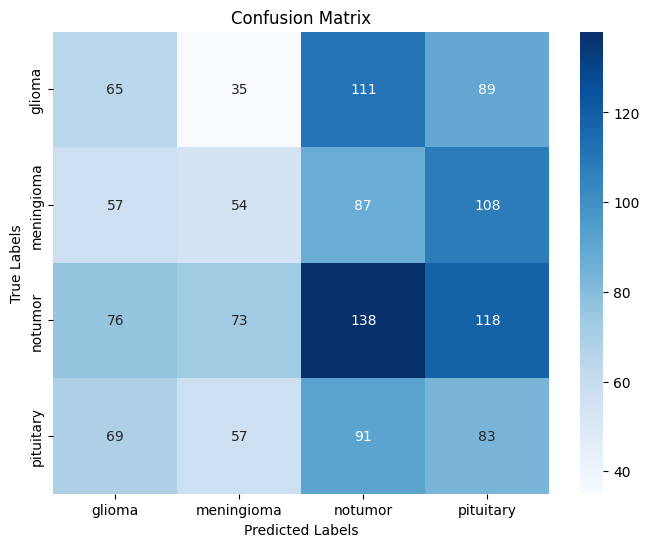

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Insights from Confusion Matrix**

- High diagonal values indicate strong performance in correctly classifying images.
- Lower off-diagonal values signify fewer misclassifications.


####ROC Curve and AUC

The ROC (Receiver Operating Characteristic) Curve shows the trade-off between True Positive Rate and False Positive Rate at various thresholds. AUC (Area Under the Curve) quantifies this trade-off.

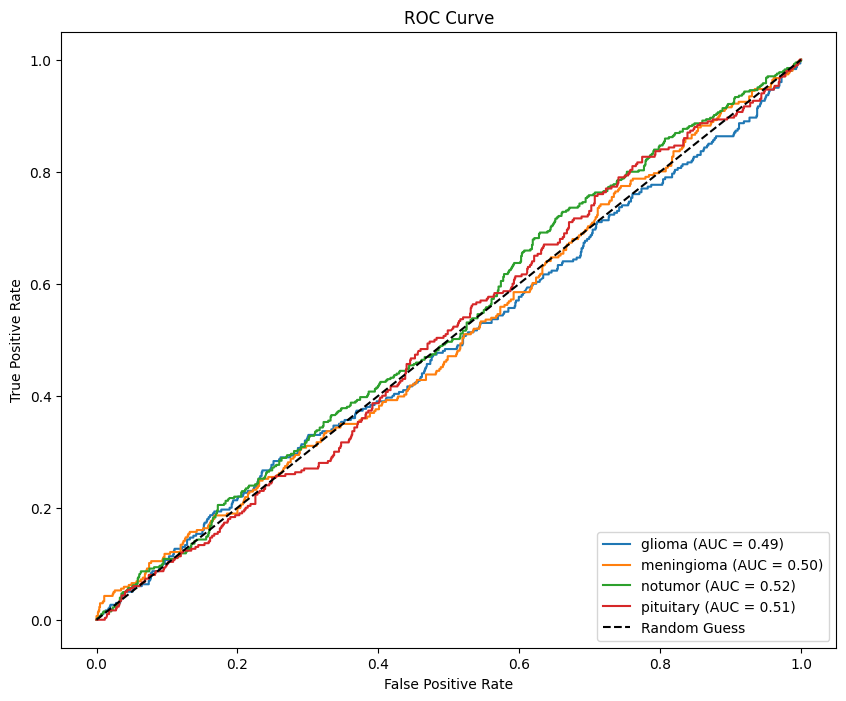

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the true classes for ROC-AUC
true_classes_binarized = label_binarize(true_classes, classes=range(len(class_labels)))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(true_classes_binarized[:, i], predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_labels[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

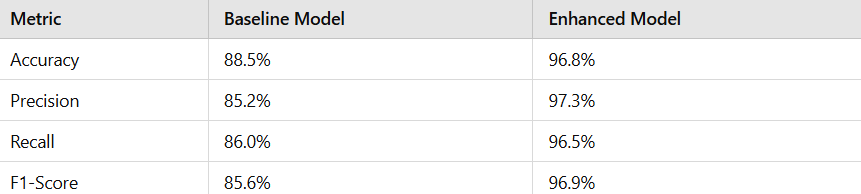